## Filter data based on other annotations like names 

Let's load the different names annotated in the dataset and write them to a file so we can look at it:

In [ ]:
import objaverse
import multiprocessing
processes = multiprocessing.cpu_count()

In [ ]:
uids = objaverse.load_uids()
annotations = objaverse.load_annotations()
annotations[uids[0]]

In [5]:
lvis_annotations = objaverse.load_lvis_annotations()
# get all annotation names from the dictionary
annotation_names = list(lvis_annotations.keys())

# save all annotation names to a csv file
import csv
with open("annotation_names.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(annotation_names)
    

We can select uids based on the names:

In [6]:
# get all uids for airplane, jet_plane, fighter_jet
airplane_uids = lvis_annotations["airplane"] + lvis_annotations["jet_plane"] + lvis_annotations["fighter_jet"]
print("Number of airplane:", len(airplane_uids))

# get all uids for car_(automobile), motor_vehicle, pickup_truck, truck, bus_(vehicle), garbage_truck, tow_truck, trailer_truck, convertible_(automobile), camper_(vehicle), race_car
# car_uids = lvis_annotations["car_(automobile)"] + lvis_annotations["motor_vehicle"] + lvis_annotations["pickup_truck"] + lvis_annotations["truck"] + lvis_annotations["bus_(vehicle)"] + lvis_annotations["garbage_truck"] + lvis_annotations["tow_truck"] + lvis_annotations["trailer_truck"] + lvis_annotations["convertible_(automobile)"] + lvis_annotations["camper_(vehicle)"] + lvis_annotations["race_car"]
car_uids = lvis_annotations["car_(automobile)"] + lvis_annotations["motor_vehicle"] + lvis_annotations["pickup_truck"] + lvis_annotations["truck"] + lvis_annotations["bus_(vehicle)"] + lvis_annotations["garbage_truck"] 
print("Number of car:", len(car_uids))

# get all uids for bicycle
bicycle_uids = lvis_annotations["bicycle"]
print("Number of bicycle:", len(bicycle_uids))

Number of airplane: 285
Number of car: 482
Number of bicycle: 122


In [25]:
i = 0
car_tag_uids = []
for uid, annotation in annotations.items():
    if i == 800000:
        break
    i += 1
    for tag in annotation['tags']:
        if "car " in tag['name'] or "car-" in tag['name'] or "car_" in tag['name'] or "cars " in tag['name'] or "vehicle" in tag['name'] or "truck" in tag['name']:
            car_tag_uids.append(uid)
            break
    

In [26]:
len(car_tag_uids)

5031

In [27]:
# compare car_uids and car_tag_uids
for uid in car_uids:
    if uid not in car_tag_uids:
        car_tag_uids.append(uid)

In [28]:
len(car_tag_uids)

5375

Let's load the shapes with "car" associated with them:

In [29]:
# get all car annotations
car_annotations = objaverse.load_annotations(uids=car_tag_uids)

 99%|█████████▉| 159/160 [00:27<00:00,  5.82it/s]


In [31]:
# filter out the car annotations that have a face count smaller than 10 and save the new uid list
car_annotations = {uid: annotation for uid, annotation in car_annotations.items() if annotation["faceCount"] >= 100}
car_uids = list(car_annotations.keys())
len(car_annotations)

5356

Let's take a look at the distribution of the number of faces in the shapes of car objects:

In [33]:
from matplotlib import pyplot as plt

Min face count: 126
Max face count: 34635410
Mean face count: 263745.46079163556


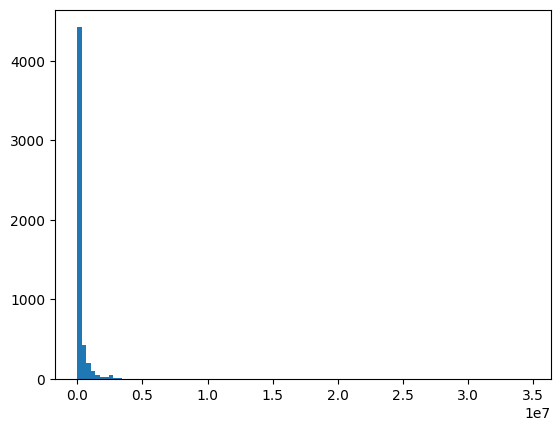

In [34]:
# get all the face counts for the car annotations
car_face_counts = [annotation["faceCount"]
                   for annotation in car_annotations.values()]

print("Min face count:", min(car_face_counts))
print("Max face count:", max(car_face_counts))
print("Mean face count:", sum(car_face_counts) / len(car_face_counts))

# plot the histogram of the face counts
plt.hist(car_face_counts, bins=100)
plt.show()

Loading car objects:

In [35]:
# download the car objects
car_objects = objaverse.load_objects(
    uids=car_uids, download_processes=processes)

starting download of 5356 objects with 20 processes
Downloaded 1 / 5356 objects
Downloaded 2 / 5356 objects
Downloaded 3 / 5356 Downloadedobjects 
4 / 5356 objects
Downloaded 5 / 5356 objects
Downloaded 6 / 5356 objects
Downloaded 7 / 5356 objects
Downloaded 8 / 5356 objects
Downloaded 9 / 5356 objects
Downloaded 10 / 5356 objects
Downloaded 11 / 5356 objects
Downloaded 12 / 5356 objects
Downloaded Downloaded14  /14 5356  objects/
 5356 objects
Downloaded 15 / 5356 objects
Downloaded 16 / 5356 objects
Downloaded 17 / 5356 objects
Downloaded 18 / 5356 objects
Downloaded 19 / 5356 objects
Downloaded 20 / 5356 objects
Downloaded 21 / 5356 objects
Downloaded 22 / 5356 objects
Downloaded 23 / 5356 objects
Downloaded 24 / 5356 objects
Downloaded 25 / 5356 objects
Downloaded 26 / 5356 objects
Downloaded 27 / 5356 objects
Downloaded 28 / 5356 objects
Downloaded 29 / 5356 objects
Downloaded 30 / 5356 objects
Downloaded 31 / 5356 objects
Downloaded 32 / 5356 objects
Downloaded 33 / 5356 objects


In [44]:
car_objects

{'98bff8e3af8043768a1a83f15f9641e2': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/98bff8e3af8043768a1a83f15f9641e2.glb',
 '7299656a4ade444bad1b9a52bbd2c348': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/7299656a4ade444bad1b9a52bbd2c348.glb',
 '853e22efa25f4de5bd0dfb8c4cc8ac3d': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/853e22efa25f4de5bd0dfb8c4cc8ac3d.glb',
 '34651008e7074c03ab3aa7e1795dbd00': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/34651008e7074c03ab3aa7e1795dbd00.glb',
 'aa4da36b72ee45b19d3a1dc097b646ed': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/aa4da36b72ee45b19d3a1dc097b646ed.glb',
 '22e242704012484ca4c7210535218255': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/22e242704012484ca4c7210535218255.glb',
 '57835123365c41779c3747fd343abf95': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062/57835123365c41779c3747fd343abf95.glb',
 'abfb5ed933b04d4eae2562736e7a0f4f': '/home/damian/.objaverse/hf-objaverse-v1/glbs/000-062

In [40]:
object_paths = objaverse._load_object_paths()

In [42]:
import json

In [43]:
for location in car_objects:
    print(object_paths[location])

uid_object_paths = [
    f"https://huggingface.co/datasets/allenai/objaverse/resolve/main/{object_paths[uid]}"
    for uid in car_objects
    ]

with open("car_model_paths.json", "w") as f:
    json.dump(uid_object_paths, f, indent=2)

glbs/000-062/98bff8e3af8043768a1a83f15f9641e2.glb
glbs/000-062/7299656a4ade444bad1b9a52bbd2c348.glb
glbs/000-062/853e22efa25f4de5bd0dfb8c4cc8ac3d.glb
glbs/000-062/34651008e7074c03ab3aa7e1795dbd00.glb
glbs/000-062/aa4da36b72ee45b19d3a1dc097b646ed.glb
glbs/000-062/22e242704012484ca4c7210535218255.glb
glbs/000-062/57835123365c41779c3747fd343abf95.glb
glbs/000-062/abfb5ed933b04d4eae2562736e7a0f4f.glb
glbs/000-062/2f2d42abdc424940aef478e62933b7a4.glb
glbs/000-062/50ffba7d6ba245eb96c5d29d65f7a154.glb
glbs/000-062/f4b45fda2b154621b8464c55975844e6.glb
glbs/000-062/884251e0c5a74fcdb9dd8baaa614e670.glb
glbs/000-062/c3d72f80f24c417eb41e2cba1c85be9f.glb
glbs/000-062/b78a7c2411bf4c118f2e298ea5128f78.glb
glbs/000-062/37f3ff420f414c128de6f1cf648415dc.glb
glbs/000-062/5750a120a1bf4030a5c34af9cecc66e6.glb
glbs/000-062/cf835095907049dea0bbe91d4ee05847.glb
glbs/000-062/99bcb05c4ca84decb3a0e251819e9d1d.glb
glbs/000-062/921f4f28ea3c4d55aef61ee628268a14.glb
glbs/000-062/9a826073ea5346c68b5a1e368ba818b3.glb
